In [133]:
import numpy as np
import sympy as sm
import math as m
import scipy as sc
import matplotlib.pyplot as plt

# Берестов Иван Михайлович
ЛР №1, Вариант 2.


# 1) Используя библиотеку NumPy, cоздать матрицу 5x5 случайных вещественных чисел, принадлежащих интервалу (0, 2).Транспонировать. Вычислить ее определитель.

In [134]:
matrix = np.random.randint(0,3,(5, 5))
matrix

array([[1, 2, 2, 0, 0],
       [2, 1, 2, 2, 2],
       [1, 2, 1, 2, 0],
       [2, 2, 2, 2, 0],
       [1, 2, 0, 2, 2]])

In [135]:
matrix = matrix.transpose()
matrix

array([[1, 2, 1, 2, 1],
       [2, 1, 2, 2, 2],
       [2, 2, 1, 2, 0],
       [0, 2, 2, 2, 2],
       [0, 2, 0, 0, 2]])

In [136]:
np.linalg.det(matrix)

np.float64(-11.999999999999995)

# 2) Используя библиотеку NumPy, cоздать вектор-столбец и матрицу подходящих размеров. Выполнить умножение матриц.

In [137]:
matrix = np.random.randint(0,10,(2, 10))
matrix

array([[3, 6, 4, 1, 9, 0, 1, 7, 2, 1],
       [8, 0, 7, 5, 5, 5, 9, 6, 7, 2]])

In [138]:
vector = np.random.randint(0,10,(10,1))
vector

array([[6],
       [5],
       [0],
       [2],
       [8],
       [9],
       [4],
       [6],
       [1],
       [4]])

In [139]:
np.dot(matrix, vector)

array([[174],
       [230]])

# 3) Используя библиотеку SymPy, упростите выражение $\frac{28a}{b}(a+b)+(2a-7b)^2$
$a=\sqrt {3}$, $b=-3.42$

In [140]:
a,b = sm.symbols('a, b')
exp = (28*a / b) * (a + b) + (2*a - 7*b)**2
exp = exp.expand()
exp

4*a**2 + 28*a**2/b - 28*a*b + 28*a + 49*b**2

In [141]:
round(exp.subs([(a, m.sqrt(3)), (b, -3.42)]), 2)

774.92

# 4) Используя библиотеку SymPy, найдите частные производные от выражения из задания выше.

In [142]:
exp.diff(a)

8*a + 56*a/b - 28*b + 28

In [143]:
exp.diff(b)

-28*a**2/b**2 - 28*a + 98*b

# 5)Используя библиотеку NumPy, найти собственные векторы и собственные значения матрицы 
$A=\begin{pmatrix}
0 & -3 & -1 \\
3 & 8 & 2 \\
-7 & -15 & -3 \\
\end{pmatrix}$

In [144]:
A = np.array([[0,-3,-1],[3,8,2],[-7,-15,-3]])
np.linalg.eig(A)

EigResult(eigenvalues=array([1.+0.00000000e+00j, 2.+9.11086655e-08j, 2.-9.11086655e-08j]), eigenvectors=array([[ 4.08248290e-01+0.00000000e+00j,  1.35951347e-15+2.88110898e-08j,
         1.35951347e-15-2.88110898e-08j],
       [-4.08248290e-01+0.00000000e+00j, -3.16227766e-01-1.92073932e-08j,
        -3.16227766e-01+1.92073932e-08j],
       [ 8.16496581e-01+0.00000000e+00j,  9.48683298e-01+0.00000000e+00j,
         9.48683298e-01-0.00000000e+00j]]))

# 6)Вычислить интеграл двумя способами: используя библиотеку SciPy и библиотеку SymPy $\int_0^4\frac{dx}{1+\sqrt{2x+1}}$

In [145]:
sc.integrate.quad(lambda x: pow(1+m.sqrt(2*x+1),-1), 0, 4)

(1.3068528194401, 1.8467446721096826e-08)

In [146]:
x=sm.symbols('x')
sm.Integral(pow(1+sm.sqrt(2*x+1),-1),(x,0,4)).doit().evalf()

1.30685281944005

# 7)Вычислить интеграл двумя способами: используя библиотеку SciPy и библиотеку SymPy $\int_0^{\pi}dx\int_0^x cos(x + y)dy$

In [147]:
def f(y, x):
    return np.cos(x + y)
res, err = sc.integrate.dblquad(f, 0, np.pi, lambda x: 0, lambda x: x)
res

-2.0

In [148]:
x, y = sm.symbols('x y')
integrand = sm.cos(x + y)
inner_integral = sm.integrate(integrand, (y, 0, x))
sm.integrate(inner_integral, (x, 0, sm.pi))

-2

# 8)Построить в одной системе координат графики функций:$\begin{cases} y = \ln(x + 5) \\ y = 3x - 2 \end{cases}\\$Оси координат должны быть подписаны, графики должны быть разного цвета, должна быть выведена легенда. Точку пересечения (если она есть) выделить на графике оранжевым цветом.

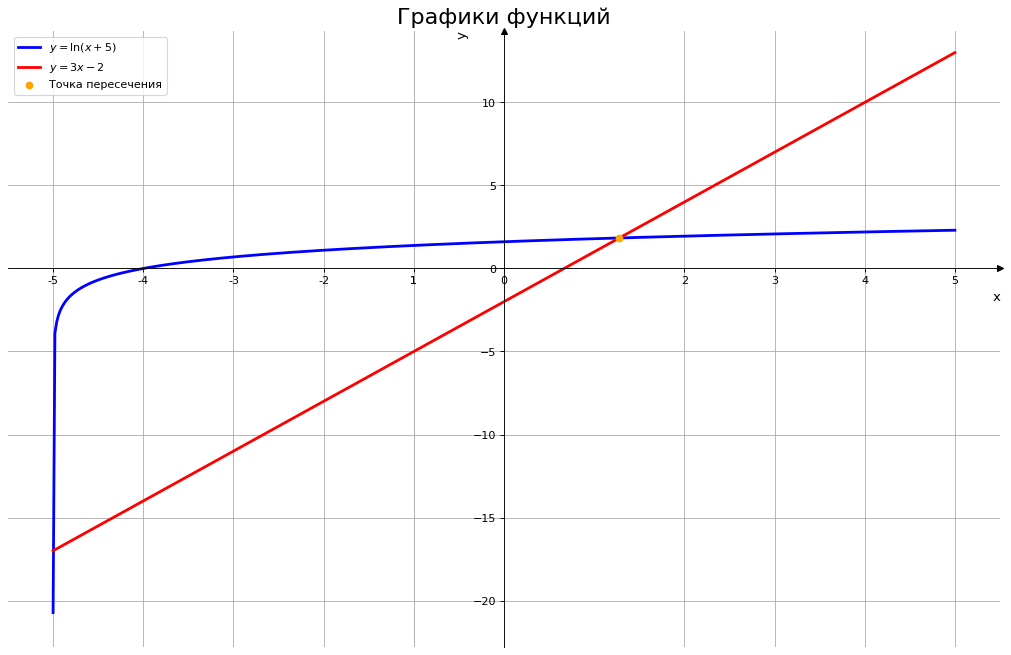

In [149]:
# Определяем функции
def f1(x):
    return np.log(x + 5)

def f2(x):
    return 3 * x - 2

# Метод половинного деления для нахождения точки пересечения
def find_intersection(f1, f2, a, b, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        c = (a + b) / 2  # Середина интервала
        if abs(f1(c) - f2(c)) < tol:  # Проверяем, нашли ли решение
            return c
        if (f1(a) - f2(a)) * (f1(c) - f2(c)) < 0:  # Корень находится в [a, c]
            b = c
        else:  # Корень находится в [c, b]
            a = c
    return (a + b) / 2  # Возвращаем приближенное значение

# Находим точку пересечения
x_intersect = find_intersection(f1, f2, a=-4.9999999, b=5)  # Интервал поиска: x > -5
y_intersect = f1(x_intersect)

# Создание объектов артборда и холста
plt.figure(figsize=(16, 10), dpi=80)
ax = plt.subplot(111)

# Удаляем правую и верхнюю границы
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Устанавливаем положение осей
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))


# Рисуем стрелки на осях
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

# Строим графики функций
x_values = np.linspace(-4.999999999, 5, 500)  # x + 5 > 0, поэтому x > -5
plt.plot(x_values, f1(x_values), color="blue", linewidth=2.5, linestyle="-", label=r'$y = \ln(x + 5)$')
plt.plot(x_values, f2(x_values), color="red", linewidth=2.5, linestyle="-", label=r'$y = 3x - 2$')

# Выделяем точку пересечения
ax.scatter(x_intersect, y_intersect, color='orange', zorder=5, label='Точка пересечения')

# Устанавливаем пределы осей
plt.xlim(x_values.min() * 1.1, x_values.max() * 1.1)
plt.ylim(min(f1(x_values).min(), f2(x_values).min()) * 1.1, max(f1(x_values).max(), f2(x_values).max()) * 1.1)

plt.xticks([-5,-4,-3,-2,-1,0,-1,2,3,4,5],
           [r'-5', r'-4', r'-3', r'-2', r'-1', r'0', r'1', r'2', r'3', r'4', r'5' ])

# Подписываем оси
plt.xlabel('x', fontsize=12,loc='right')
plt.ylabel('y', fontsize=12,loc='top')

# Добавляем легенду
plt.legend(loc='upper left', frameon=True)

# Добавляем сетку
plt.grid()

# Показываем график
plt.title('Графики функций', fontsize=20)
plt.show()